In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/9643944R.png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/9278228R.png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/ModerateG3 (191).png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/9799305L.png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/ModerateG3 (63).png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/ModerateG3 (92).png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/9002817R.png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/9438852L.png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/ModerateG3 (217).png
/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid/Osteoarthritis/9367389R.png
/kaggle/input/d/vasa

# **`Import Dependencies `**

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import optimizers


# **`Setting Directories and Reading Images `**

In [15]:
train_dir = "/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/train"
validation_dir = "/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/Valid"
test_dir ="/kaggle/input/d/vasanthgowdamk/osteoarthritis/Osteoarthritis/test"

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


# `Create a convolution base using (InceptionV3)GoogLeNet`

In [17]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

# **`Create a CNN model by adding a Fully Connected Classifier `**

In [18]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 23,900,449
Trainable params: 23,866,017
Non-trainable params: 34,432
_________________________________________________________________


# **`Compile the Model`**

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

# **`Setting Checkpoints and Training `**

In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model_osteoarthritis.h5", save_best_only =True)

early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    restore_best_weights=True,
    patience = 10
)

In [22]:
history = model.fit(
      train_generator,
      steps_per_epoch=117,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=32,
      callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
117/117 [==============================] - 31s 180ms/step - loss: 0.5875 - acc: 0.6717 - val_loss: 0.4593 - val_acc: 0.7516
Epoch 2/100
117/117 [==============================] - 21s 177ms/step - loss: 0.5054 - acc: 0.7356 - val_loss: 0.4536 - val_acc: 0.7422
Epoch 3/100
117/117 [==============================] - 20s 174ms/step - loss: 0.4612 - acc: 0.7678 - val_loss: 0.4913 - val_acc: 0.7344
Epoch 4/100
117/117 [==============================] - 20s 171ms/step - loss: 0.4145 - acc: 0.7961 - val_loss: 0.2844 - val_acc: 0.8656
Epoch 5/100
117/117 [==============================] - 20s 171ms/step - loss: 0.4114 - acc: 0.8073 - val_loss: 0.2393 - val_acc: 0.8906
Epoch 6/100
117/117 [==============================] - 20s 173ms/step - loss: 0.3755 - acc: 0.8223 - val_loss: 0.1960 - val_acc: 0.9266
Epoch 7/100
117/117 [==============================] - 20s 172ms/step - loss: 0.3392 - acc: 0.8541 - val_loss: 0.1429 - val_acc: 0.9453
Epoch 8/100
117/117 [===========================

# **`Plotting the training session`**

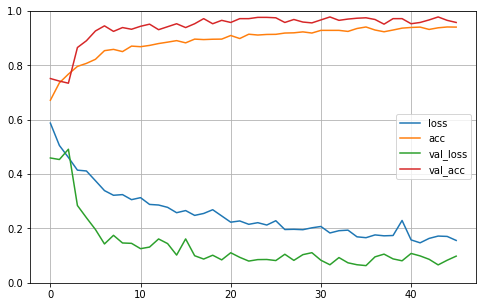

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **`Evaluating the result on the testing dataset`**

In [24]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128,128),
        batch_size=20,
        class_mode='binary')

Found 845 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator, steps=42)

# **`Predicting the images of the testing dataset`**

In [113]:
#np.random.seed(42)
#tf.random.set_seed(42)
#if random images are to be picked 

In [114]:
predictions = model.predict(test_generator, steps=42, verbose=0)

In [115]:
y_pred = predictions[:5].round(2)


In [116]:
print(y_pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [117]:
y_pred.astype(int)

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [121]:
test_generator.class_indices

{'Normal': 0, 'Osteoarthritis': 1}